In [10]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, precision_score, recall_score,accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows = 4000
%matplotlib inline
df_orders = pd.read_csv('orders.csv')
df_orders = df_orders.drop_duplicates()

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 56.1+ KB


In [11]:
df_orders = df_orders.dropna(subset=["transactionId","visitorId","date","revenue","group"])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 56.1+ KB


In [20]:
df_visitors = pd.read_csv("visitors.csv")

df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
df_visitors = df_visitors.drop_duplicates()
df_visitors = df_visitors.dropna(subset=["date","group","visitors"])
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [12]:
datesGroups = df_orders[['date','group']].drop_duplicates()

In [37]:
datesAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group'])
datesAggregated = datesAggregated.rename(columns={'transactionId':'orders','visitorID':'buyers'})

In [38]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], 
            df_visitors['group'] == x['group'])].agg({'date' : 'max', 
            'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [39]:
result = pd.concat([datesAggregated,visitorsAggregated['visitors']], axis=1)
result

,date,group,orders,visitorId,revenue,visitors
55,2019-08-01,A,24,20,148579,719
66,2019-08-01,B,21,20,101217,713
175,2019-08-02,A,44,38,242401,1338
173,2019-08-02,B,45,43,266748,1294
291,2019-08-03,A,68,62,354874,1845
310,2019-08-03,B,61,59,380996,1803
499,2019-08-04,A,84,77,425699,2562
498,2019-08-04,B,78,75,489567,2573
698,2019-08-05,A,109,100,549917,3318
699,2019-08-05,B,101,98,581995,3280


In [40]:
cumulativeRevenueA = result[result['group'] == 'A']
cumulativeRevenueA

,date,group,orders,visitorId,revenue,visitors
55,2019-08-01,A,24,20,148579,719
175,2019-08-02,A,44,38,242401,1338
291,2019-08-03,A,68,62,354874,1845
499,2019-08-04,A,84,77,425699,2562
698,2019-08-05,A,109,100,549917,3318
362,2019-08-06,A,127,114,598401,3985
580,2019-08-07,A,145,131,740818,4629
835,2019-08-08,A,161,146,837097,5239
569,2019-08-09,A,177,159,1025603,5856
859,2019-08-10,A,193,175,1236098,6262


In [41]:
cumulativeRevenueB = result[result['group'] == 'B']
cumulativeRevenueB

,date,group,orders,visitorId,revenue,visitors
66,2019-08-01,B,21,20,101217,713
173,2019-08-02,B,45,43,266748,1294
310,2019-08-03,B,61,59,380996,1803
498,2019-08-04,B,78,75,489567,2573
699,2019-08-05,B,101,98,581995,3280
360,2019-08-06,B,129,123,824337,3935
581,2019-08-07,B,153,146,1049671,4644
789,2019-08-08,B,180,171,1270589,5298
567,2019-08-09,B,205,193,1431401,5908
794,2019-08-10,B,228,215,1539203,6277


In [42]:
dates_A = cumulativeRevenueA['date']
conversion_A =  cumulativeRevenueA['orders']/cumulativeRevenueA['visitors']

In [45]:
dates_B = cumulativeRevenueB['date']
conversion_B =  cumulativeRevenueB['orders']/cumulativeRevenueB['visitors']

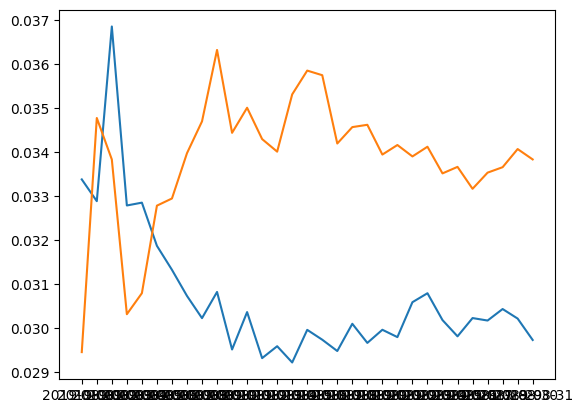

In [46]:
plt.plot(dates_A, conversion_A)
plt.plot(dates_B, conversion_B)
plt.show()